In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from tqdm import tqdm
import matplotlib.pyplot as plt

### Generating data

In [2]:
RANDOM_STATE = 42

In [ ]:
def my_make_classification(
    n_samples=1000, n_features=50, n_informative=15, random_state=42
):

    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=n_informative,
        random_state=random_state,
    )
    X = pd.DataFrame(X)
    y = pd.Series(y)
    X.columns = [f"col_{col}" for col in X.columns]
    return X, y

In [4]:
X, target = my_make_classification()
print(X.shape, target.shape)

numerical = X.columns
print(numerical)

(1000, 50) (1000,)
Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49'],
      dtype='object')


In [5]:
df = X

df['y'] = target
df.sample(5)


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49,y
822,-1.239172,-0.304443,1.799526,-0.384595,0.654915,7.845164,-1.301184,-2.374277,-0.900640,1.155994,...,1.281611,1.824466,3.012412,-0.871190,-0.066687,-0.893114,1.259109,1.711301,-3.148507,1
630,1.554376,-0.049226,-0.114350,0.413588,-1.333441,-0.799492,-0.624239,1.391055,-0.866016,0.270437,...,2.254382,0.269151,2.786412,-1.110789,-1.555975,1.530615,-1.348038,-1.815846,-1.672798,0
173,0.846219,0.028375,3.776219,0.313759,0.977012,-3.293098,-0.391476,1.826469,1.011707,-0.054135,...,-0.403050,0.616130,0.703651,-0.100248,-0.011058,-0.014816,1.631471,-0.193839,-2.846242,1
607,0.335556,0.311208,2.534393,0.314514,-0.451837,-1.715595,0.975611,1.220071,-1.165529,0.151673,...,-0.060406,2.845776,-6.559437,-1.080057,0.748944,-0.111466,-1.856788,-1.122033,-4.130665,0
642,-0.692703,-0.793164,-0.710969,-1.550973,1.814805,-5.308531,0.512672,1.751230,0.411475,-1.493946,...,0.084574,-2.669664,-0.056278,-1.457317,-2.119762,0.178286,-0.851214,1.266605,-1.659902,0


### Individual gini

In [6]:
train_gini, valid_gini = train_test_split(df[numerical], test_size=0.2, stratify=df['y'], random_state=RANDOM_STATE)

# numeral = list of numerical features
gini_features = pd.DataFrame(index=numerical, columns=["gini_train", "gini_valid"])

train_gini = train_gini.join(df['y'], how='left')
valid_gini = valid_gini.join(df['y'], how='left')


In [7]:

for feat in tqdm(numerical):
    logreg = LogisticRegression(random_state=RANDOM_STATE, penalty="l2", C=1)
    logreg.fit(train_gini.loc[:, feat].values.reshape(-1, 1), train_gini["y"])
    preds_train = logreg.predict_proba(train_gini.loc[:, feat].values.reshape(-1, 1))[:, 1]
    preds_valid = logreg.predict_proba(valid_gini.loc[:, feat].values.reshape(-1, 1))[:, 1]
    gini_features.loc[feat, 'gini_train'] = 2 * roc_auc_score(train_gini["y"], preds_train) - 1
    gini_features.loc[feat, 'gini_valid'] = 2 * roc_auc_score(valid_gini["y"], preds_valid) - 1


100%|██████████| 50/50 [00:00<00:00, 480.64it/s]


In [8]:
gini_features.sort_values('gini_valid', ascending=False)

,gini_train,gini_valid
col_27,0.501397,0.4976
col_39,0.363596,0.4916
col_11,0.216883,0.3776
col_14,0.279658,0.3312
col_42,0.251608,0.3126
col_49,0.23607,0.2994
col_47,0.285921,0.2112
col_20,0.052882,0.2044
col_45,0.236095,0.1954
col_5,0.038106,0.1942


### Accumulated_gini

In [15]:
# Выбираем визуально
thr = 0.0

In [16]:
top_gini_features = gini_features[gini_features['gini_valid'] >= thr].sort_values("gini_valid", ascending=False).index.tolist()

In [17]:
ginis = {
    "train": {},
    "valid": {}
}

In [18]:
for n_features in tqdm(range(1, len(top_gini_features) + 1)):
    used_features = top_gini_features[:n_features]
    logreg = LogisticRegression(random_state=RANDOM_STATE, penalty="l2", C=1)
    logreg.fit(train_gini.loc[:, used_features], train_gini["y"])
    preds_train = logreg.predict_proba(train_gini.loc[:, used_features])[:, 1]
    preds_valid = logreg.predict_proba(valid_gini.loc[:, used_features])[:, 1]
    ginis["train"][n_features] = 2 * roc_auc_score(train_gini["y"], preds_train) - 1
    ginis["valid"][n_features] = 2 * roc_auc_score(valid_gini["y"], preds_valid) - 1

100%|██████████| 31/31 [00:00<00:00, 189.18it/s]


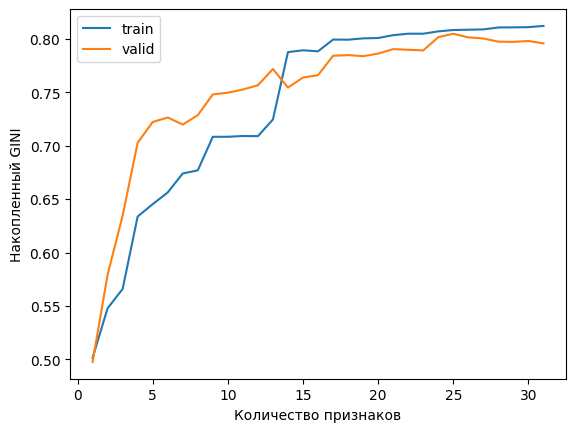

In [19]:
pd.DataFrame(ginis).plot()
plt.xlabel("Количество признаков")
plt.ylabel("Накопленный GINI")
plt.show()

In [20]:
OPTIMAL_NUMBER = pd.DataFrame(ginis)["valid"].idxmax()
OPTIMAL_NUMBER

np.int64(25)